In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Load the data
sample_id = "IMMUNEX006"
path = '../data/intermediate/IMMUNEX006/annotated_adata.h5ad'
adata = sc.read(path)

display(adata.obs.head())

/home/mounim/miniconda3/envs/spatial_env/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/mounim/miniconda3/envs/spatial_env/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


,n_counts,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,nn_10 leiden_1,Tumor cells_score,CD8 T cells_score,CD4 T cells_score,Tregs_score,...,pDC_score,Naive B_score,Memory B_score,Germinal Center B_score,Plasma Cells_score,Myofibroblasts_score,Fibroblasts_score,Pericytes_score,Endothelial cells_score,batch
100,20.500000,734,1271.880089,68.778546,5.407628,13,0.181215,-0.096715,-0.269891,-0.077367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
10000,12.921875,700,1447.558771,63.653897,4.397327,13,0.579080,-0.189063,-0.296719,-0.136230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
100000,20.250000,555,887.555639,58.957620,6.642696,14,0.275303,-0.049741,-0.299420,-0.017237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
100001,25.363636,261,305.890795,10.752070,3.515003,9,0.579657,-0.089501,-0.086951,-0.049513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
100002,27.363636,280,305.625824,14.281660,4.672923,9,-0.333197,-0.186064,-0.046359,-0.140847,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
adata.raw

In [2]:
import sys
sys.path.append("/opt/Banksy_py")
import banksy as banksy
import time; import random

from banksy.initialize_banksy import initialize_banksy
from banksy.run_banksy import run_banksy_multiparam
from banksy_utils.color_lists import spagcn_color
from banksy_utils.plot_utils import plot_qc_hist, plot_cell_positions


/home/mounim/miniconda3/envs/spatial_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
from banksy_utils.plot_utils import plot_qc_hist, plot_cell_positions

# bin options for fomratting histograms
# Here, we set 'auto' for 1st figure, 80 bins for 2nd figure. and so on
hist_bin_options = ['auto', 50, 80, 100]

plot_qc_hist(adata, 
         total_counts_cutoff = 300, # for visualization
         n_genes_high_cutoff = 1000, # for visualization
         n_genes_low_cutoff = 0, # for visualization
         bin_options = hist_bin_options)

NameError: name 'adata' is not defined

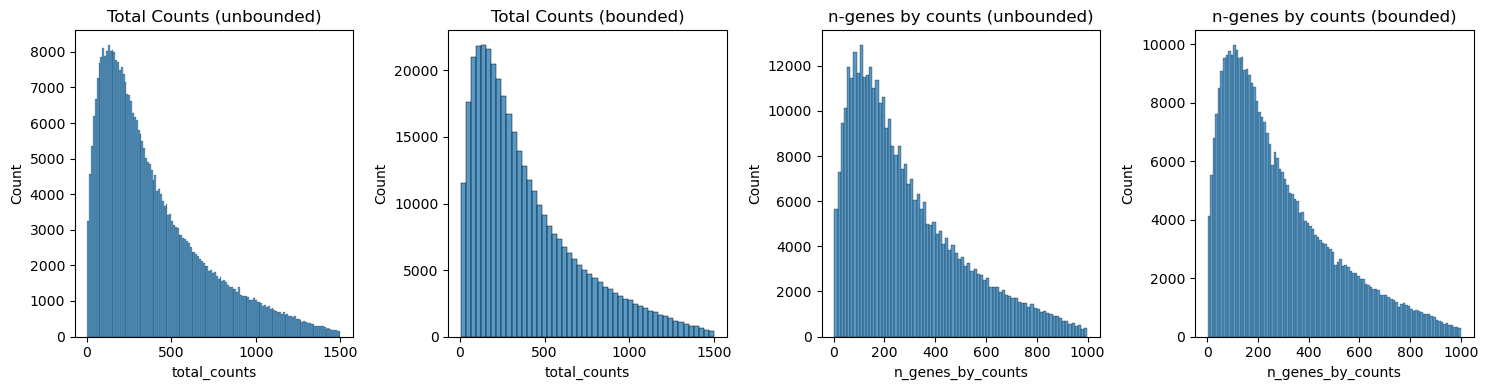

In [4]:
# Do an initial filter of cells by their cell counts, MT count and gene counts
# We can then first filter cells by their counts, MT and gene filters.
from banksy_utils.load_data import load_adata, display_adata

from banksy_utils.filter_utils import filter_cells

adata_filtred = adata.copy()

plot_qc_hist(adata_filtred,
        total_counts_cutoff=2000,
        n_genes_high_cutoff=2000, 
        n_genes_low_cutoff= 0,
        bin_options = hist_bin_options)


In [5]:
import scipy.sparse
if not scipy.sparse.issparse(adata_filtred.X):
    adata_filtred.X = scipy.sparse.csr_matrix(adata_filtred.X)
display_adata(adata_filtred)
    

Displaying adata Object and their attributes
Adata attributes and dimensions:


AnnData object with n_obs × n_vars = 380827 × 18396
    obs: 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'nn_10 leiden_1', 'Tumor cells_score', 'CD8 T cells_score', 'CD4 T cells_score', 'Tregs_score', 'B cells_score', 'Plasma cells_score', 'NK cells_score', 'Monocytes/Macrophages_score', 'Dendritic cells_score', 'CAFs_score', 'manual_annotation', 'manual_celltype', 'Tumor_score', 'T/NK cells_score', 'B lineage_score', 'Myeloid_score', 'Stromal_score', 'leiden', 'Basal-like_score', 'Classical_score', 'Secretory_score', 'Neuroendocrine_score', 'EMT-like_score', 'subclass', 'CD4 Naive T_score', 'CD4 Effector T_score', 'CD8 Naive T_score', 'CD8 Effector T_score', 'Exhausted T_score', 'MAIT/NKT_score', 'tcell_subclass', 'Classical Monocytes_score', 'Non-Classical Monocytes_score', 'M1 Macrophages_score', 'M2 Macrophages_score', 'TAMs_score', 'cDC1_score', 'cDC2_score', 'pDC_score', 'Naive B_score', 'Memory B_score', 'Germinal Center B_score', 'Plasma

Matrix sparsity: 7005693492 filled elements (1.00) out of 7005693492
max: 10.0, min: -1.8577897020372276

Displaying observations (adata.obs)


,n_counts,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,nn_10 leiden_1,Tumor cells_score,CD8 T cells_score,CD4 T cells_score,Tregs_score,...,pDC_score,Naive B_score,Memory B_score,Germinal Center B_score,Plasma Cells_score,Myofibroblasts_score,Fibroblasts_score,Pericytes_score,Endothelial cells_score,batch
100,20.500000,734,1271.880089,68.778546,5.407628,13,0.181215,-0.096715,-0.269891,-0.077367,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
10000,12.921875,700,1447.558771,63.653897,4.397327,13,0.579080,-0.189063,-0.296719,-0.136230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
100000,20.250000,555,887.555639,58.957620,6.642696,14,0.275303,-0.049741,-0.299420,-0.017237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
100001,25.363636,261,305.890795,10.752070,3.515003,9,0.579657,-0.089501,-0.086951,-0.049513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
100002,27.363636,280,305.625824,14.281660,4.672923,9,-0.333197,-0.186064,-0.046359,-0.140847,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99956,18.600000,89,98.041326,5.119529,5.221807,8,-0.193535,-0.044780,-0.024726,-0.017237,...,NaN,NaN,NaN,NaN,NaN,-0.026229,-0.135970,-0.161143,-0.031264,4
99972,7.846154,96,157.954288,6.648027,4.208830,3,-0.166762,-0.044639,-0.095448,-0.050917,...,NaN,NaN,NaN,NaN,NaN,-0.026229,-0.135970,0.002891,-0.031264,4
99993,15.125000,117,166.338904,1.380078,0.829678,3,-0.195259,-0.019563,-0.117063,-0.017237,...,NaN,NaN,NaN,NaN,NaN,-0.026229,0.464680,-0.048616,-0.031264,4
99996,16.000000,126,185.087749,0.000000,0.000000,3,-0.271199,-0.077344,-0.125109,-0.051097,...,NaN,NaN,NaN,NaN,NaN,-0.026229,2.189699,-0.051335,-0.031264,4


Displaying variables (adata.var)


,gene_ids,feature_types,genome,n_cells,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,mean,std
OR4F5,ENSG00000186092,Gene Expression,GRCh38,103,False,97,0.000329,0.000014,99.975236,128.763997,4.916475,0.000794,0.053430
SAMD11,ENSG00000187634,Gene Expression,GRCh38,239,False,205,0.000649,0.000031,99.947664,254.257150,5.702810,0.001946,0.086648
NOC2L,ENSG00000188976,Gene Expression,GRCh38,8816,False,7456,0.023756,0.001103,98.096493,9305.080988,9.282492,0.054046,0.416042
KLHL17,ENSG00000187961,Gene Expression,GRCh38,1679,False,1514,0.004672,0.000208,99.613478,1829.834404,7.616481,0.011741,0.200261
PLEKHN1,ENSG00000187583,Gene Expression,GRCh38,1983,False,1767,0.005552,0.000249,99.548887,2174.593163,7.793911,0.012574,0.200996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND4L,ENSG00000212907,Gene Expression,GRCh38,520599,True,210709,1.487616,0.066491,46.206261,582696.159701,13.414300,2.056232,2.005510
MT-ND4,ENSG00000198886,Gene Expression,GRCh38,439771,True,194952,1.253121,0.056190,50.229003,490845.162799,13.240770,1.846382,1.953279
MT-ND5,ENSG00000198786,Gene Expression,GRCh38,95174,True,68894,0.263151,0.012104,82.411450,103075.887632,11.683375,0.556190,1.276680
MT-ND6,ENSG00000198695,Gene Expression,GRCh38,198669,True,119461,0.549349,0.025106,69.501759,215179.006115,12.419470,1.012700,1.621628


{'fig_size': (8, 8), 's': 0.01, 'c1': 'red', 'c2': 'slateblue', 'label1': 'Original', 'label2': 'Filtered', 'add_circle': False, 'puck_center': (3330, 3180), 'puck_radius': 2550}


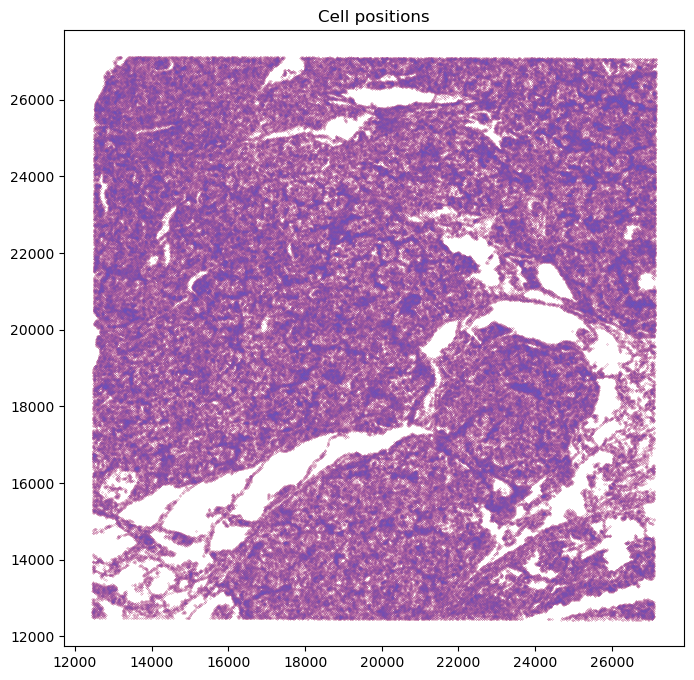

In [6]:
# Convert spatial coordinates to obs columns
adata.obs['spatial_0'] = adata.obsm['spatial'][:, 0]
adata.obs['spatial_1'] = adata.obsm['spatial'][:, 1]

# Call the plotting function with updated coord_keys
plot_cell_positions(
    adata=adata,
    raw_x=adata.obsm['spatial'][:, 0],
    raw_y=adata.obsm['spatial'][:, 1],
    coord_keys=('spatial_0', 'spatial_1'),
    s=0.01,
    label1="Original",
    label2="Filtered"
)


In [ ]:
from banksy_utils.filter_utils import normalize_total, filter_hvg, print_max_min

# Step 1: Make a copy of filtered data
adata_normalized = adata_filtred.copy()

# Step 2: Identify highly variable genes — modify filter_hvg to skip log1p inside
adata_normalized, adata_allgenes = filter_hvg(
    adata_normalized,
    n_top_genes=2500,
    flavor="seurat"
)

# Step 3: Inspect
display_adata(adata_normalized)


In [50]:
resolutions = [.9] # clustering resolution for Leiden clustering

pca_dims = [20] # number of dimensions to keep after PCA

lambda_list = [.8] # lambda

k_geom = 15 # 15 spatial neighbours

max_m = 1 # use AGF

nbr_weight_decay = "scaled_gaussian" # can also be "reciprocal", "uniform" or "ranked"

banksy_dict = initialize_banksy(
    adata,
    coord_keys,
    k_geom,
    nbr_weight_decay=nbr_weight_decay,
    max_m=max_m,
    plt_edge_hist=True,
    plt_nbr_weights=True,
    plt_agf_angles=False,
    plt_theta=False,
)

NameError: name 'coord_keys' is not defined

In [36]:
annotation_key = 'manual_annotation' # Key to access annotations in adata.obs[annotation_keys]

results_df = run_banksy_multiparam(
    adata,
    banksy_dict,
    lambda_list,
    resolutions,
    color_list = spagcn_color,
    max_m = max_m,
    filepath = output_folder,
    key = coord_keys,
    pca_dims = pca_dims,
    annotation_key = annotation_key,
    max_labels = num_clusters,
    cluster_algorithm = cluster_algorithm,
    match_labels = False,
    savefig = False,
    add_nonspatial = False,
    variance_balance = False,
)

Runtime Apr-23-2025-19-41

18396 genes to be analysed:
Gene List:
Index(['OR4F5', 'SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1', 'PERM1', 'HES4',
       'ISG15', 'AGRN', 'RNF223',
       ...
       'MT-CO1', 'MT-CO2', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4',
       'MT-ND5', 'MT-ND6', 'MT-CYB'],
      dtype='object', length=18396)

Decay Type: scaled_gaussian
Weights Object: {'weights': {0: <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5712405 stored elements and shape (380827, 380827)>, 1: <Compressed Sparse Row sparse matrix of dtype 'complex128'
	with 11424810 stored elements and shape (380827, 380827)>}}

Nbr matrix | Mean: -0.01 | Std: 0.22
Size of Nbr | Shape: (380827, 18396)
Top 3 entries of Nbr Mat:

[[-0.01485189 -0.02246044 -0.12990485]
 [-0.01485189 -0.02246044 -0.12990485]
 [-0.01485189 -0.02246044 -0.12990485]]


KeyboardInterrupt: 